# Section Global : Explanation on UKL 183

## Example Reference Notebook:
Remove Trend Seaonality Example.ipynb

## Objective:
#### Remove Trend and Seasonality with Module  : [statmodels]
### statmodels
1. Dicky-Fuller Test for Stationarity: test_DickeyFuller, test_DickeyFuller_values
2. Decompose Time-Series to see Individual Components: DecomposeTStoseeIndividualComponents
3. Checking Whether Time-Series is Stationary or Not
  - moving window functioins to check mean, var, auto-covar: CheckingWhetherTSStationaryorNot, plottingautocorrelation
4. Remove Trend
 - log transformation: RemoveTrend_LoggedTransformation
 - power transformation: RemoveTrend_PowerTransformations
 - Applying Moving Window Functions: ApplyingMovingWindowFunctions

 - Applying Moving Window Function on Log Transformed Time-Series: ApplyingMovingWindowFunctiononLogTransformedTS
 - Applying Moving Window Function on Power Transformed Time-Series: ApplyingMovingWindowFunctiononPowerTransformedTS
 - Applying Linear Regression to Remove Trend: ApplyingLinearRegressiontoRemoveTrend

5. Remove Seasonality
 - differencing: RemoveSeasonality_Differencing_logged
 - Differencing Over Power Transformed Time-Series: DifferencingOverPowerTransformedTS
 - Differencing Over Logged Transformed Time-Series: DifferencingOverLoggedTransformedTS
 - Differencing Over Time-Series with Rolling Mean taken over 12 Months: DifferencingOverTimeSerieswithRollingMeantakenover12Months
 - Differencing Over Log Transformed & Mean Rolled Time-Series: DifferencingOverLogTransformedMeanRolledTimeSeries
 - Differencing Over Power Transformed & Mean Rolled Time-Series: DifferencingOverPowerTransformedMeanRolledTimeSeries
 - Differencing Over Linear Regression Transformed Time-Series: DifferencingOverLinearRegressionTransformedTimeSeries

# To Do:
1. Create Global Function for Seasonality and Trend Removal (Done)
2. Document Objective (Done)


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.regression.linear_model import OLS

In [77]:
%matplotlib inline
df = pd.read_csv('./datasets/AirPassengers.csv', index_col=0, parse_dates = True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


c:\users\malco\appdata\local\programs\python\python36\lib\site-packages\scipy\signal\signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


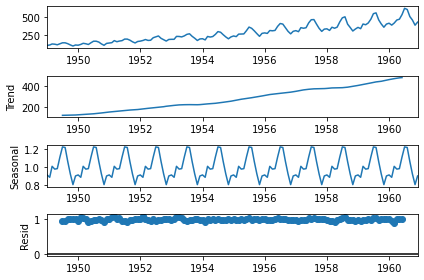

In [6]:
def DecomposeTStoseeIndividualComponents(df):
    air_passengers = df
    decompose_result=seasonal_decompose(air_passengers, model='multiplicative')
    trend = decompose_result.trend
    seasonal = decompose_result.seasonal
    residual = decompose_result.resid
    decompose_result.plot();
# DecomposeTStoseeIndividualComponents(df)

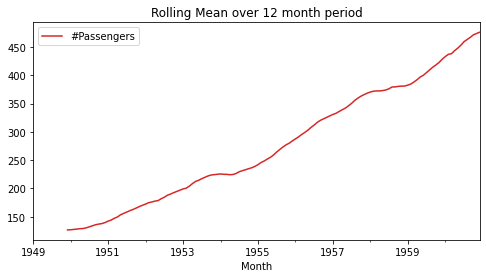

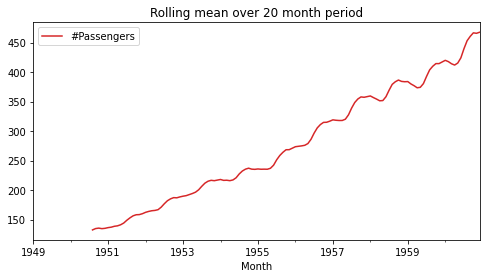

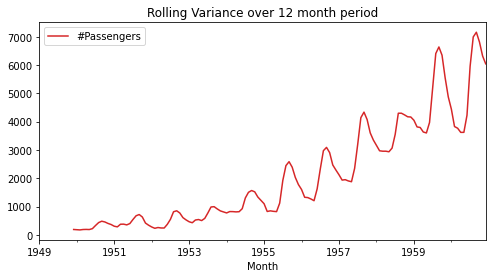

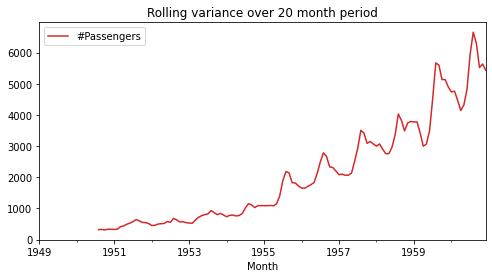

In [8]:
def CheckingWhetherTSStationaryorNot(df):
    air_passengers=df
    air_passengers.rolling(window = 12).mean().plot(figsize=(8,4), color="tab:red", title="Rolling Mean over 12 month period");
    air_passengers.rolling(window = 20).mean().plot(figsize=(8,4), color="tab:red", title="Rolling mean over 20 month period");
    air_passengers.rolling(window = 12).var().plot(figsize=(8,4), color="tab:red", title="Rolling Variance over 12 month period");
    air_passengers.rolling(window = 20).var().plot(figsize=(8,4), color="tab:red", title="Rolling variance over 20 month period");
# CheckingWhetherTSStationaryorNot(df)

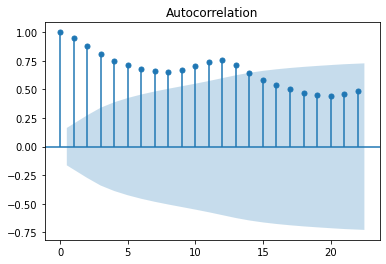

In [11]:
def plottingautocorrelation(df):
    plot_acf(df);
# plottingautocorrelation(df)

In [20]:
df.columns.to_list()

['#Passengers']

In [54]:
def test_DickeyFuller(df, col_name):
    air_passengers = df
    from statsmodels.tsa.stattools import adfuller
    dftest = adfuller(df.dropna()[col_name], autolag = 'AIC')
    dftest

    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)
    print('p-value: ', dftest[1])
    if dftest[1]>= 0.05:
        print('p-value: is GREATER than 0.05 hence our time-series IS NOT STATIONARY')
    else:
        print('p-value: is LESS than 0.05 hence our time-series IS STATIONARY')
# test_DickeyFuller(df,'#Passengers')

1. ADF :  0.8153688792060568
2. P-Value :  0.9918802434376411
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598
p-value:  0.9918802434376411
p-value: is GREATER than 0.05 hence our time-series IS NOT STATIONARY


In [116]:
def test_DickeyFuller_values(df, col_name):
    air_passengers = df
    from statsmodels.tsa.stattools import adfuller
    dftest = adfuller(df.dropna().values, autolag = 'AIC')
    dftest

    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)
    print('p-value: ', dftest[1])
    if dftest[1]>= 0.05:
        print('p-value: is GREATER than 0.05 hence our time-series IS NOT STATIONARY')
    else:
        print('p-value: is LESS than 0.05 hence our time-series IS STATIONARY')
# test_DickeyFuller(df,'#Passengers')

1. ADF :  0.8153688792060568
2. P-Value :  0.9918802434376411
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598
p-value:  0.9918802434376411
p-value: is GREATER than 0.05 hence our time-series IS NOT STATIONARY


Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
                ...   
1960-08-01    6.406880
1960-09-01    6.230481
1960-10-01    6.133398
1960-11-01    5.966147
1960-12-01    6.068426
Name: #Passengers, Length: 144, dtype: float64

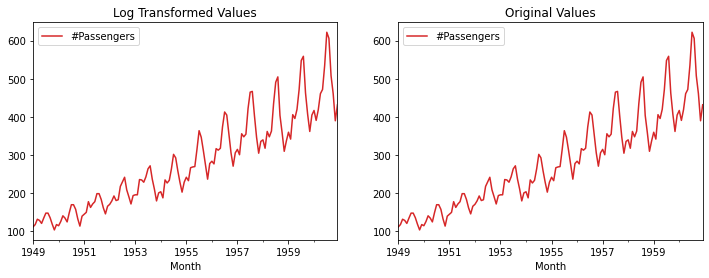

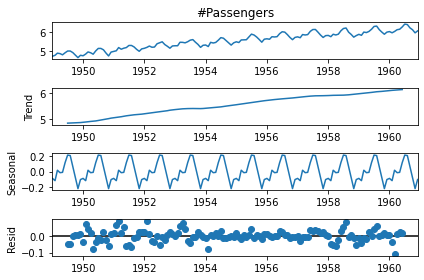

In [25]:
def RemoveTrend_LoggedTransformation(df,col_name):
    
    # log of each individual value of time-series data.
    logged_passengers=df[col_name].apply(lambda x: np.log(x))

    ax1 = plt.subplot(121)
    df.plot(figsize=(12,4) ,color="tab:red", title="Log Transformed Values", ax=ax1);
    ax2 = plt.subplot(122)
    df.plot(color="tab:red", title="Original Values", ax=ax2);
    
    decompose_result = seasonal_decompose(logged_passengers)
    decompose_result.plot();
    return logged_passengers
# RemoveTrend_LoggedTransformation(df,'#Passengers')

Month
1949-01-01    10.583005
1949-02-01    10.862780
1949-03-01    11.489125
1949-04-01    11.357817
1949-05-01    11.000000
                ...    
1960-08-01    24.617067
1960-09-01    22.538855
1960-10-01    21.470911
1960-11-01    19.748418
1960-12-01    20.784610
Name: #Passengers, Length: 144, dtype: float64

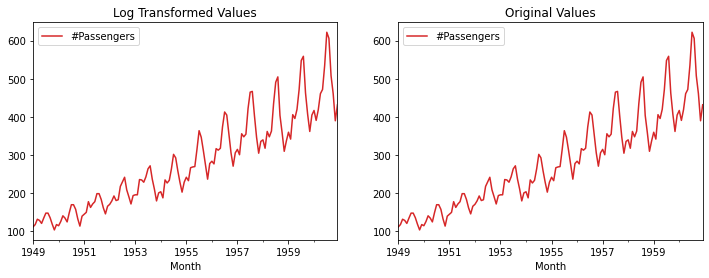

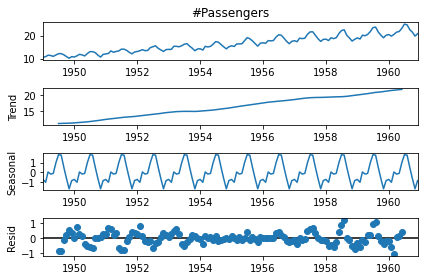

In [27]:
def RemoveTrend_PowerTransformations(df,col_name):
    
    # log of each individual value of time-series data.
    powered_passengers = df[col_name].apply(lambda x : x ** 0.5)

    ax1 = plt.subplot(121)
    df.plot(figsize=(12,4) ,color="tab:red", title="Log Transformed Values", ax=ax1);
    ax2 = plt.subplot(122)
    df.plot(color="tab:red", title="Original Values", ax=ax2);
    
    decompose_result = seasonal_decompose(powered_passengers)
    decompose_result.plot();
    return powered_passengers
# RemoveTrend_PowerTransformations(df,'#Passengers')

c:\users\malco\appdata\local\programs\python\python36\lib\site-packages\scipy\signal\signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,142.666667
1960-09-01,40.916667
1960-10-01,-10.583333


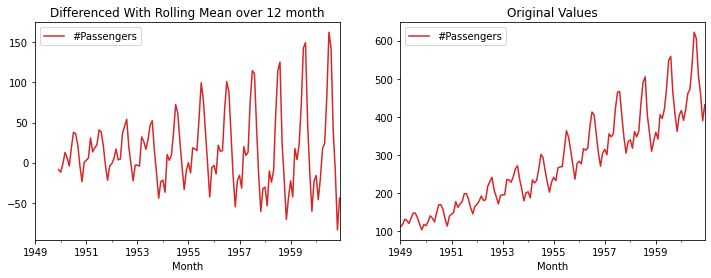

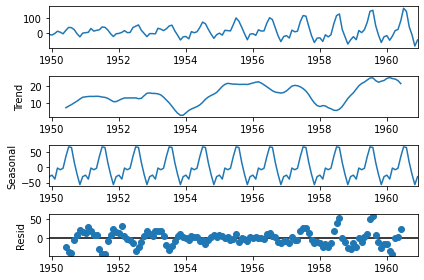

In [31]:
def ApplyingMovingWindowFunctions(df):
    air_passengers = df
    rolling_mean = df.rolling(window = 12).mean()
    passengers_rolled_detrended = air_passengers - rolling_mean

    ax1 = plt.subplot(121)
    passengers_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Differenced With Rolling Mean over 12 month", ax=ax1);
    ax2 = plt.subplot(122)
    air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);
    
    decompose_result = seasonal_decompose(passengers_rolled_detrended.dropna())
    decompose_result.plot();
    return passengers_rolled_detrended
# ApplyingMovingWindowFunctions(df)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
                ...   
1960-08-01    0.282363
1960-09-01    0.098235
1960-10-01   -0.009230
1960-11-01   -0.182690
1960-12-01   -0.085789
Name: #Passengers, Length: 144, dtype: float64

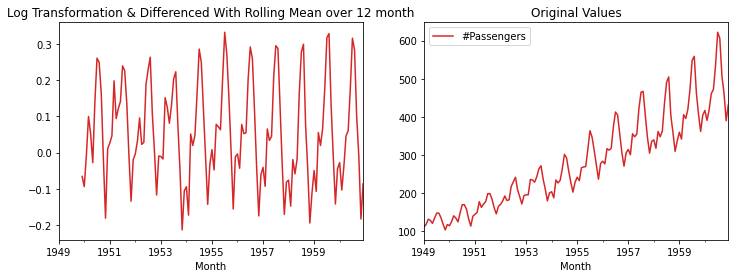

In [38]:
def ApplyingMovingWindowFunctiononLogTransformedTS(df, col_name):
    air_passengers = df
    logged_passengers = pd.DataFrame(df[col_name].apply(lambda x : np.log(x)))

    rolling_mean = logged_passengers.rolling(window = 12).mean()
    passengers_log_rolled_detrended = logged_passengers[col_name] - rolling_mean[col_name]


    ax1 = plt.subplot(121)
    passengers_log_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Log Transformation & Differenced With Rolling Mean over 12 month", ax=ax1);
    ax2 = plt.subplot(122)
    air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);
    return passengers_log_rolled_detrended
# ApplyingMovingWindowFunctiononLogTransformedTS(df, '#Passengers')

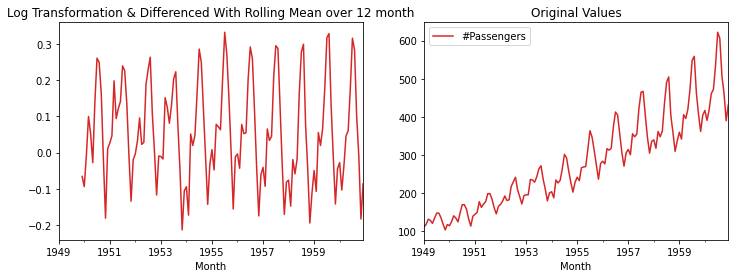

In [37]:
def ApplyingMovingWindowFunctiononPowerTransformedTS(df, col_name):
    air_passengers = df
    powered_passengers = pd.DataFrame(df[col_name].apply(lambda x : np.log(x)))

    rolling_mean = logged_passengers.rolling(window = 12).mean()
    passengers_log_rolled_detrended = logged_passengers[col_name] - rolling_mean[col_name]


    ax1 = plt.subplot(121)
    passengers_log_rolled_detrended.plot(figsize=(12,4),color="tab:red", title="Log Transformation & Differenced With Rolling Mean over 12 month", ax=ax1);
    ax2 = plt.subplot(122)
    air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);
    return passengers_log_rolled_detrended
# ApplyingMovingWindowFunctiononLogTransformedTS(df, '#Passengers')

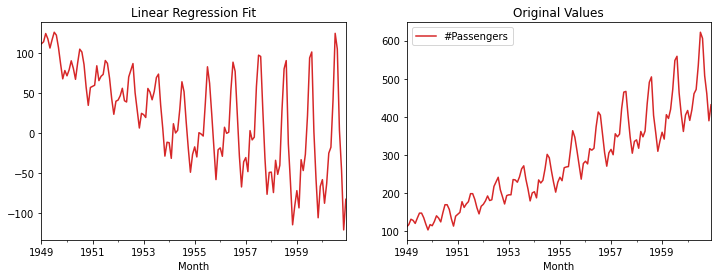

In [35]:
def ApplyingLinearRegressiontoRemoveTrend(df,col_name ):
    air_passengers = df
    least_squares = OLS(air_passengers[col_name].values, list(range(air_passengers.shape[0])))
    result = least_squares.fit()

    fit = pd.Series(result.predict(list(range(air_passengers.shape[0]))), index = air_passengers.index)

    passengers_ols_detrended = air_passengers[col_name] - fit


    ax1 = plt.subplot(121)
    passengers_ols_detrended.plot(figsize=(12,4), color="tab:red", title="Linear Regression Fit", ax=ax1);
    ax2 = plt.subplot(122)
    air_passengers.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);
    return passengers_ols_detrended
# ApplyingLinearRegressiontoRemoveTrend(df, '#Passengers')

## Remove Seasonality
#### Differencing

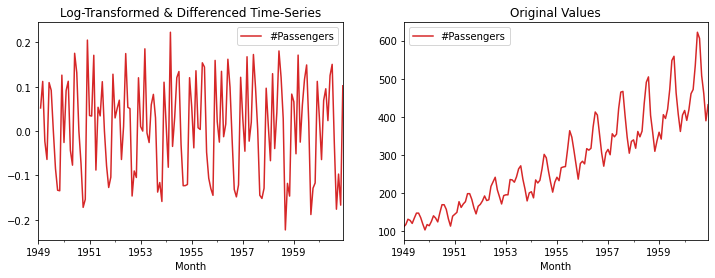

1. ADF :  -2.717130598388135
2. P-Value :  0.07112054815085833
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 128
5. Critical Values :
	 1% :  -3.4825006939887997
	 5% :  -2.884397984161377
	 10% :  -2.578960197753906
p-value:  0.07112054815085833
p-value: is GREATER than 0.05 hence our time-series IS NOT STATIONARY


In [55]:
def RemoveSeasonality_Differencing_logged(df, col_name):
    
    logged_passengers = pd.DataFrame(df[col_name].apply(lambda x : np.log(x)))
    logged_passengers_diff = logged_passengers - logged_passengers.shift()
    ax1 = plt.subplot(121)
    logged_passengers_diff.plot(figsize=(12,4), color="tab:red", title="Log-Transformed & Differenced Time-Series", ax=ax1)
    ax2 = plt.subplot(122)
    df.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);
    plt.show()
    test_DickeyFuller(logged_passengers_diff, col_name)
# RemoveSeasonality_Differencing_logged(df, '#Passengers')

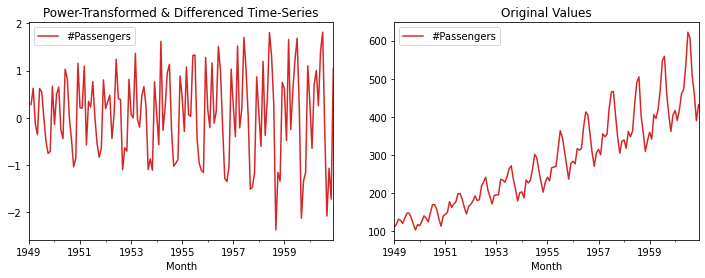

1. ADF :  -3.1864222911642046
2. P-Value :  0.020784185571267426
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598
p-value:  0.020784185571267426
p-value: is LESS than 0.05 hence our time-series IS STATIONARY


In [87]:
def DifferencingOverPowerTransformedTS(df, col_name):
    powered_passengers = pd.DataFrame(df[col_name].apply(lambda x : x ** 0.5))

#     powered_passengers = df[col_name].apply(lambda x : x ** 0.5)

    powered_passengers_diff = powered_passengers - powered_passengers.shift()

    ax1 = plt.subplot(121)
    powered_passengers_diff.plot(figsize=(12,4), color="tab:red", title="Power-Transformed & Differenced Time-Series", ax=ax1);
    ax2 = plt.subplot(122)
    df.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);
    plt.show()
    test_DickeyFuller(powered_passengers_diff, col_name)

# DifferencingOverPowerTransformedTS(df, '#Passengers')

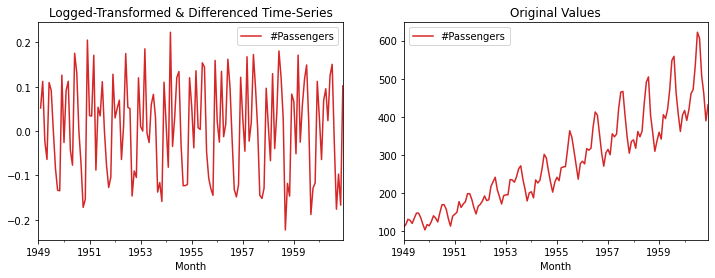

1. ADF :  -2.717130598388135
2. P-Value :  0.07112054815085833
3. Num Of Lags :  14
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 128
5. Critical Values :
	 1% :  -3.4825006939887997
	 5% :  -2.884397984161377
	 10% :  -2.578960197753906
p-value:  0.07112054815085833
p-value: is GREATER than 0.05 hence our time-series IS NOT STATIONARY


In [88]:
def DifferencingOverLoggedTransformedTS(df, col_name):
#     Logged_passengers = df[col_name].apply(lambda x : np.log(x))
    Logged_passengers = pd.DataFrame(df[col_name].apply(lambda x : np.log(x)))

    Logged_passengers_diff = Logged_passengers - Logged_passengers.shift()

    ax1 = plt.subplot(121)
    Logged_passengers_diff.plot(figsize=(12,4), color="tab:red", title="Logged-Transformed & Differenced Time-Series", ax=ax1);
    ax2 = plt.subplot(122)
    df.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);
    plt.show()
    test_DickeyFuller(Logged_passengers_diff, col_name)
    
# DifferencingOverLoggedTransformedTS(df, '#Passengers')

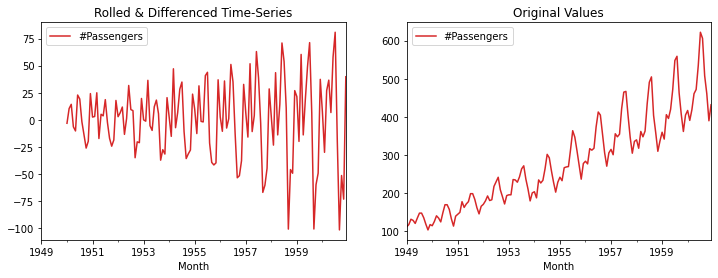

1. ADF :  -3.1544826348635486
2. P-Value :  0.022775264967860986
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 119
5. Critical Values :
	 1% :  -3.4865346059036564
	 5% :  -2.8861509858476264
	 10% :  -2.579896092790057
p-value:  0.022775264967860986
p-value: is LESS than 0.05 hence our time-series IS STATIONARY


In [93]:
def DifferencingOverTimeSerieswithRollingMeantakenover12Months(df , col_name):

    rolling_mean = df.rolling(window = 12).mean()
    passengers_rolled_detrended = df - rolling_mean
    
    passengers_rolled_detrended_diff = passengers_rolled_detrended - passengers_rolled_detrended.shift()

    ax1 = plt.subplot(121)
    passengers_rolled_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Rolled & Differenced Time-Series", ax=ax1);
    ax2 = plt.subplot(122)
    df.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);
    plt.show()
    test_DickeyFuller(passengers_rolled_detrended_diff, col_name)
# DifferencingOverTimeSerieswithRollingMeantakenover12Months(df , '#Passengers')

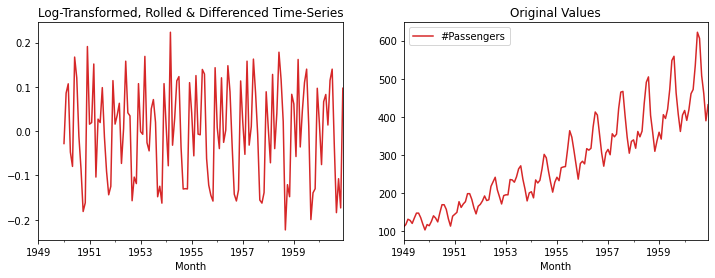

1. ADF :  -3.912981245419513
2. P-Value :  0.0019413623769364854
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 118
5. Critical Values :
	 1% :  -3.4870216863700767
	 5% :  -2.8863625166643136
	 10% :  -2.580009026141913
p-value:  0.0019413623769364854
p-value: is LESS than 0.05 hence our time-series IS STATIONARY


In [118]:
def DifferencingOverLogTransformedMeanRolledTimeSeries(df, col_name):
    logged_passengers = pd.DataFrame(df[col_name].apply(lambda x : np.log(x)))

    rolling_mean = logged_passengers.rolling(window = 12).mean()
    passengers_log_rolled_detrended = logged_passengers[col_name] - rolling_mean[col_name]

    passengers_log_rolled_detrended_diff = passengers_log_rolled_detrended - passengers_log_rolled_detrended.shift()

    ax1 = plt.subplot(121)
    passengers_log_rolled_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Log-Transformed, Rolled & Differenced Time-Series", ax=ax1);
    ax2 = plt.subplot(122)
    df.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);
    plt.show()

    test_DickeyFuller_values(passengers_log_rolled_detrended_diff, col_name)
# DifferencingOverLogTransformedMeanRolledTimeSeries(df, '#Passengers')

1. ADF :  -3.912981245419513
2. P-Value :  0.0019413623769364854
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 118
5. Critical Values :
	 1% :  -3.4870216863700767
	 5% :  -2.8863625166643136
	 10% :  -2.580009026141913
p-value:  0.0019413623769364854
p-value: is LESS than 0.05 hence our time-series IS STATIONARY


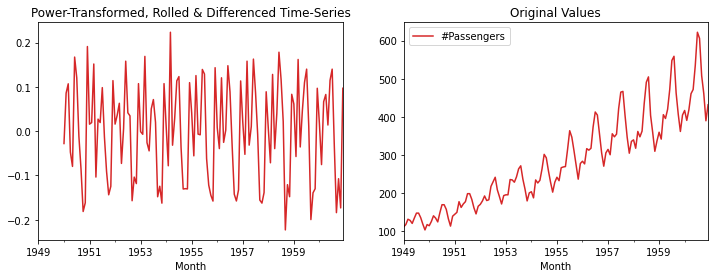

In [119]:
def DifferencingOverPowerTransformedMeanRolledTimeSeries(df, col_name):

    powered_passengers = pd.DataFrame(df[col_name].apply(lambda x : np.log(x)))
    rolling_mean = powered_passengers.rolling(window = 12).mean()
    passengers_pow_rolled_detrended = powered_passengers[col_name] - rolling_mean["#Passengers"]
    
    passengers_pow_rolled_detrended_diff = passengers_pow_rolled_detrended - passengers_pow_rolled_detrended.shift()

    ax1 = plt.subplot(121)
    passengers_pow_rolled_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Power-Transformed, Rolled & Differenced Time-Series", ax=ax1);
    ax2 = plt.subplot(122)
    df.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);
    test_DickeyFuller_values(passengers_pow_rolled_detrended_diff, col_name)
# DifferencingOverPowerTransformedMeanRolledTimeSeries(df, '#Passengers')

1. ADF :  -2.8292668241700123
2. P-Value :  0.054213290283823795
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598
p-value:  0.054213290283823795
p-value: is GREATER than 0.05 hence our time-series IS NOT STATIONARY


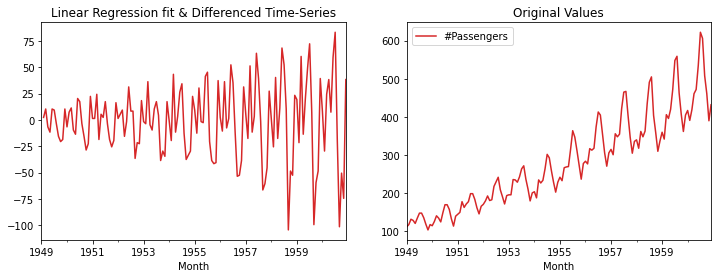

In [125]:
def DifferencingOverLinearRegressionTransformedTimeSeries(df, col_name):

    least_squares = OLS(df[col_name].values, list(range(df.shape[0])))
    result = least_squares.fit()

    fit = pd.Series(result.predict(list(range(df.shape[0]))), index = df.index)

    passengers_ols_detrended = df[col_name] - fit

    passengers_ols_detrended_diff = passengers_ols_detrended - passengers_ols_detrended.shift()

    ax1 = plt.subplot(121)
    passengers_ols_detrended_diff.plot(figsize=(8,4), color="tab:red", title="Linear Regression fit & Differenced Time-Series", ax=ax1);
    ax2 = plt.subplot(122)
    df.plot(figsize=(12,4), color="tab:red", title="Original Values", ax=ax2);
    
    test_DickeyFuller_values(passengers_ols_detrended_diff, col_name)
# DifferencingOverLinearRegressionTransformedTimeSeries(df,'#Passengers')